In [26]:
#Emotion detection

In [27]:
import matplotlib.pyplot as plt
from glob import glob
from tensorflow.keras.layers import Dense
import cv2
import random
import os
%matplotlib inline
import keras
import tensorflow as tf


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import  Input ,Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG , Image
print(":" , tf.__version__)

: 2.16.1


In [29]:
images =  glob("train/**/**")

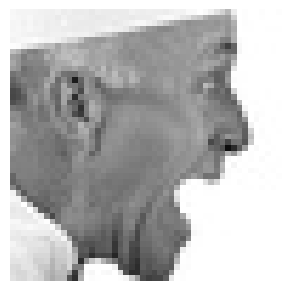

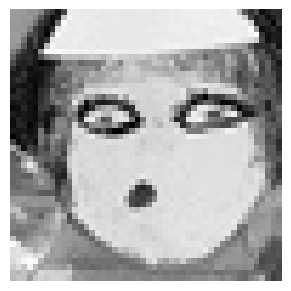

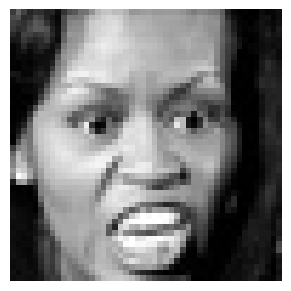

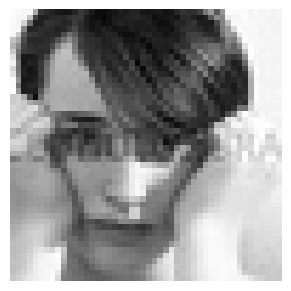

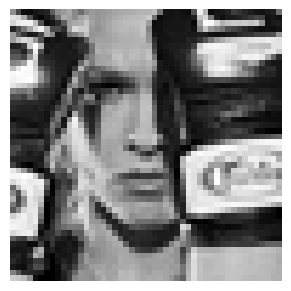

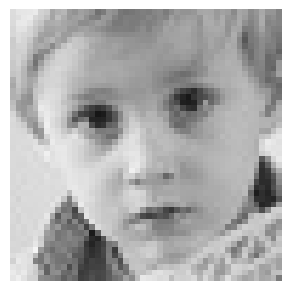

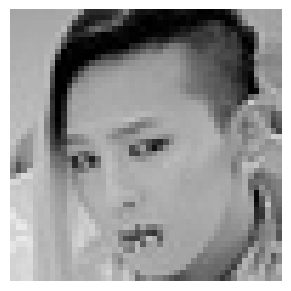

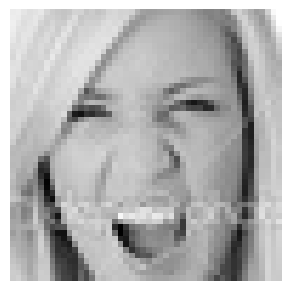

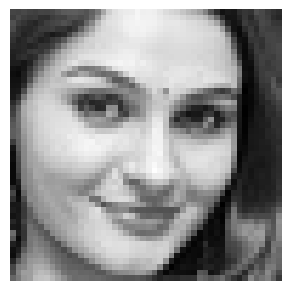

In [30]:
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')



In [31]:
img_size= 48
batch_size= 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    shuffle = True)

Found 28709 images belonging to 7 classes.


In [32]:
datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    shuffle = True)

Found 7178 images belonging to 7 classes.


In [33]:
def Convolution(input_tensor, filters, kernel_size):
    x= Conv2D(filters = filters, kernel_size= kernel_size, padding="same")(input_tensor)
    x= BatchNormalization()(x)
    x= Activation("relu")(x)
    x= MaxPooling2D(pool_size= (2,2))(x)
    x= Dropout(0.25)(x)
    return x

In [34]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x= BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)

    return x

In [40]:
num_classes = len(train_generator.class_indices)
def model_fer(input_shape , num_classes):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32 , (3,3))
    conv_2 = Convolution(conv_1, 64 , (5,5))
    conv_3 = Convolution(conv_2, 128 , (3,3))

    flatten = Flatten()(conv_3)

    dense_1 = Dense_f(flatten, 256)

  
    output= Dense(7, activation="softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])
    
    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])
    return model



In [42]:
model = model_fer((48,48,1), num_classes)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [43]:
epochs = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

# Checkpoint callback
checkpoint = ModelCheckpoint(
    "model_weight.weights.h5",
    monitor='val_accuracy',
    save_weights_only=True,
    mode='max',
    verbose=1
)
callbacks = [checkpoint]

In [44]:
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_steps=validation_steps,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/15


C:\Users\abhic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.3108 - loss: 1.8405
Epoch 1: saving model to model_weight.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 239s 523ms/step - accuracy: 0.3109 - loss: 1.8401 - val_accuracy: 0.4484 - val_loss: 1.4434
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 53s 120ms/step - accuracy: 0.4375 - loss: 1.5330
Epoch 2: saving model to model_weight.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - accuracy: 0.4375 - loss: 1.5330 - val_accuracy: 0.4000 - val_loss: 1.3897
Epoch 3/15


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.4598 - loss: 1.4068
Epoch 3: saving model to model_weight.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 56s 126ms/step - accuracy: 0.4598 - loss: 1.4068 - val_accuracy: 0.5066 - val_loss: 1.2950
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 51s 116ms/step - accuracy: 0.5312 - loss: 1.3400
Epoch 4: saving model to model_weight.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 154us/step - accuracy: 0.5312 - loss: 1.3400 - val_accuracy: 0.4000 - val_loss: 1.5072
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.5132 - loss: 1.2815
Epoch 5: saving model to model_weight.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 56s 125ms/step - accuracy: 0.5132 - loss: 1.2815 - val_accuracy: 0.4925 - val_loss: 1.3354
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 53s 119ms/step - accuracy: 0.5781 - loss: 1.1095
Epoch 6: saving model to model_weight.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 165us/step - accuracy: 0.5781 - loss: 1.1095 - val_accuracy: 0.2000 - 

In [46]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.5253 - loss: 1.2961


[1.2944486141204834, 0.5206185579299927]

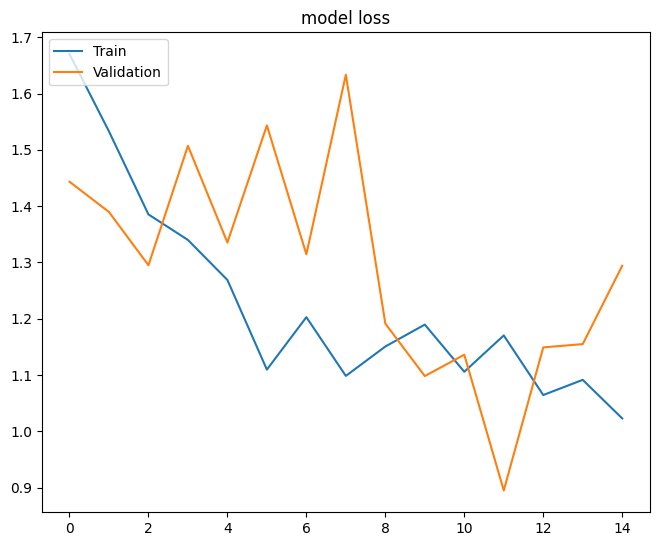

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left= 0.0, hspace= 0.25, wspace= 0.35)

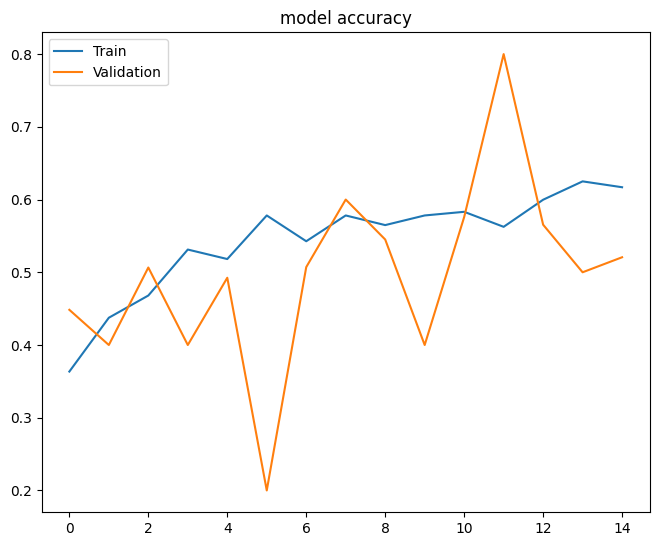

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left= 0.0, hspace= 0.25, wspace= 0.35)

In [50]:
model_json= model.to_json()
with open("model_a.json", "w") as json_file:
    json_file.write(model_json)
